Task about lakes

- Generate 20 random variable from 1 to 100
- Draw the plot of the sequence
- Lets assume each point represent the height and so all plotting is 2d mountains.
- Then consider the unlimited rain from above - cavities become lakes full of water.
- Determine the deepest lake

*Simple rewrite of test task*

Random list is: [65 17 52 25 16 94 67 26 83 50 22 43 67 90  5 50 50 23 99 63]
'Lakes' ranges:
	=>  [65 17]
	=>  [52 25 16]
	=>  [94 67 26]
	=>  [83 50 22 43 67]
	=>  [90  5 50 50 23]


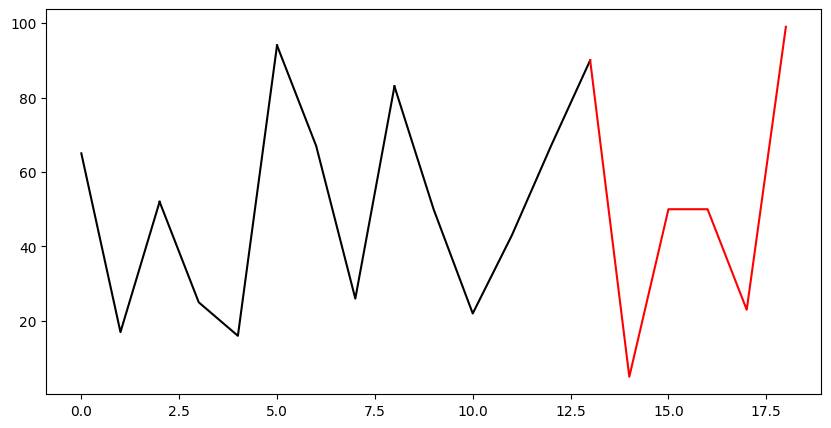

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

from scipy.signal import argrelextrema


# STEP 1 random dataset
SIZE = 20
np_rnd = np.random.randint(0, 100, size=SIZE)
print('Random list is:', np_rnd)

# STEP 2 find extremas
it_ext_max = argrelextrema(np_rnd, np.greater)[0]
it_last = 0
ranges = list()
print("'Lakes' ranges:")

for it_max in it_ext_max:
    ranges.append(np_rnd[it_last:it_max])
    print('\t=> ', ranges[-1])
    it_last = it_max

# STEP 3 visualize
np.random.seed(42)

plt.figure(figsize=(10, 5))
it_last = 0

for rng in ranges:
    clr = 'red' if min(rng) == min(min(row) for row in ranges) else 'black'
    plt.plot(range(SIZE)[it_last:it_last + len(rng) + 1], np_rnd[it_last:it_last + len(rng) + 1], color=clr)
    it_last = it_last + len(rng)
    pass

plt.show()

**Task about sum and product**

There are two whole numbers:

> 1 < a,b < 100

One scientist("Sum") get provided with sum of numbers,
another  ("Prod") get provided with product of numbers.
Both scientists know that numbers 1 < a,b <100.

Determine the numbers being based on the following dialog:
- Prod: I don't know the numbers;
- Sum: I know it;
- Prod: then I know the numbers;
- Sum: then I know the numbers too.

# **Thinking**

> Обмеження чисел


`Цілі числа`

`Більше 1`

`Меньше 100`

`Числа можуть повторюватися`



# Interpretation #1

> Вислів *Prod: I don't know the numbers*

Немає однозначного значення двох чисел для отримання результату множення

> Вислів *Sum: I know it*

Мається на увазі умова що відома сума чисел

> Вислів *Prod: then I know the numbers*

Додаткова умова коли відома сума чисел та відомо лише дава числа для отримання результату множення

> Вислів *Sum: then I know the numbers too*

Додаткова умова коли відомо лише два числа для отримання результату множення

# Conclusion #1

У першій інтерпретації якщо сприймати кожне речення діалогу як окремий фільтр, на мою думку не можна однозначно визначити, що означає "then": це "якщо" чи "та". Також не однозначно сформовано 1 та 3 речення - воно протилежне одне одному. Тому у 1 інтерпретації буде результат ніякий - (Null, Null)

# Interpretation #2

> Вислів *Prod: I don't know the numbers*

Неунікальний добуток двох чисел

> Вислів *Sum: I know it*

Це означає, що сума є унікальною серед всіх пар, які дають не унікальний добуток.

> Вислів *Prod: then I know the numbers*

Лишити унікальний добуток чисел

> Вислів *Sum: then I know the numbers too*

Лишити суми пар із унікальними доданками

In [ ]:
from itertools import combinations_with_replacement


# STEP 1
# Prod: I don't know the numbers

pairs = [(a, b) for a, b in combinations_with_replacement(range(2, 100), 2)]
product_map = {}

for a, b in pairs:
    product = a * b

    if product not in product_map:
        product_map[product] = []

    product_map[product].append((a, b))
    pass

# filter more 1
ambiguous_products = {p: pairs for p, pairs in product_map.items() if len(pairs) > 1}


# STEP 2
# Sum: I knows it

sum_map = {}
valid_sums = {}

# sum map
for a, b in pairs:
    s = a + b

    if s not in sum_map:
        sum_map[s] = []

    sum_map[s].append((a, b))
    pass

# valid sums
for s, pairs in sum_map.items():
    valid_pairs = [pair for pair in pairs if pair in ambiguous_products.get(pair[0] * pair[1], [])]

    if len(valid_pairs) == 1:
        valid_sums[s] = valid_pairs
    pass

# STEP 3 & 4
# Prod: then I know the numbers
# Sum: then I know the numbers too

filtered_products = {}

for p, pairs in ambiguous_products.items():
    valid_pairs = [pair for pair in pairs if pair in valid_sums.get(pair[0] + pair[1], [])]

    if len(valid_pairs) == 1:
        filtered_products[p] = valid_pairs
    pass

result = list()

for pairs in filtered_products.values():
    if len(pairs) == 1:
        result.append(pairs[0])
    pass

print("The numbers are:", result)


The numbers are: [(3, 4), (69, 96), (84, 84)]
